In [43]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [44]:
def display_img(images, labels):
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

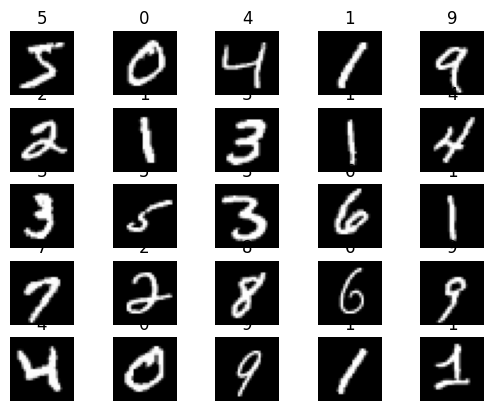

In [45]:
import matplotlib.pyplot as plt
display_img(x_train[:30], y_train[:30])

# Now need to rashape data

In [46]:
# here i convert the 2d images into 3d images as i need 4d

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# need to one hot encoding for classification

In [47]:
to_categorical = tf.keras.utils.to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(y_train[0], y_test[0])
print(y_train.shape, y_test.shape)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.] [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(60000, 10) (10000, 10)


# Now need to build my own model

In [48]:
from tensorflow.keras.layers import Flatten, Input, Dense, Conv2D


In [49]:
inputs = Input((28,28,1), name='input_layer')
x = Flatten()(inputs)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs, x, name='Digits_classifier')
model.summary()

Model: "Digits_classifier"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               200960    
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Now need to compile and train with datasets

In [51]:
model.compile(loss= 'categorical_crossentropy', metrics='accuracy')
model.fit(x_train, y_train, batch_size=32, epochs=10)

Epoch 1/10
1334/1875 [====================>.........] - ETA: 1s - loss: 0.6321 - accuracy: 0.9529

KeyboardInterrupt: 

# Predict and evalute the model

In [ ]:
import numpy as np
score = model.evaluate(x_test, y_test)
print(score)

# Predict Y values
predictY = model.predict(x_test)

print('OriginalY   PredictedY')
print('=========   ==========')
for i in range(10):
  print(np.argmax(y_test[i]), '\t\t', np.argmax(predictY[i]))

313/313 [==============================] - 1s 2ms/step - loss: 0.7673 - accuracy: 0.9645
[0.7673063278198242, 0.9645000100135803]
313/313 [==============================] - 0s 1ms/step
OriginalY   PredictedY
=========   ==========
7 		 7
2 		 2
1 		 1
0 		 0
4 		 4
1 		 1
4 		 4
9 		 9
5 		 5
9 		 9


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rotation_range = 40,
    shear_range = 0.2,
    zoom_range = 0.2
)

train_generator = train_datagen.flow(
    x_train,
    y_train,
    batch_size = len(x_train)
)

In [ ]:
train_generator[0][0].shape

(60000, 28, 28, 1)

In [ ]:
import numpy as np
aug_images = []
aug_labels = []

for _ in range(1):
    images,labels = next(train_generator)
    aug_images.extend(images)
    aug_labels.extend(labels)




In [ ]:
aug_images =  np.array(aug_images)
aug_images.shape

(60000, 28, 28, 1)

In [ ]:
combined_x_train = np.concatenate((x_train,aug_images),axis = 1)
combined_x_train.shape

(60000, 56, 28, 1)

In [ ]:
a = np.array([[1],[2]])
b = np.array([[3],[4]])
c = np.concatenate((a,b), axis=1)
print(a)
print(b)
print(c)

[[1]
 [2]]
[[3]
 [4]]
[[1 3]
 [2 4]]
